In [1]:
# Importing Libraries

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

import statsmodels.api as sm

from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE

from statsmodels.stats.outliers_influence import variance_inflation_factor

In [2]:
lead_df = pd.read_csv('Leads.csv')
pd.set_option('display.max_columns', 100)
lead_df.head(10)

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,NaN,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Interested in other courses,Low in Relevance,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,NaN,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,Business Administration,Select,Student,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Word Of Mouth,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,Not Sure,No,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,Select,Other,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified
5,2058ef08-2858-443e-a01f-a9237db2f5ce,660680,API,Olark Chat,No,No,0,0.0,0,0.0,Olark Chat Conversation,NaN,NaN,NaN,NaN,NaN,No,No,No,No,No,No,No,No,NaN,NaN,No,No,NaN,NaN,01.High,02.Medium,17.0,15.0,No,No,Modified
6,9fae7df4-169d-489b-afe4-0f3d752542ed,660673,Landing Page Submission,Google,No,No,1,2.0,1640,2.0,Email Opened,India,Supply Chain Management,Online Search,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Low in Relevance,No,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,No,Modified
7,20ef72a2-fb3b-45e0-924e-551c5fa59095,660664,API,Olark Chat,No,No,0,0.0,0,0.0,Olark Chat Conversation,NaN,NaN,NaN,NaN,NaN,No,No,No,No,No,No,No,No,NaN,NaN,No,No,NaN,NaN,02.Medium,02.Medium,15.0,15.0,No,No,Modified
8,cfa0128c-a0da-4656-9d47-0aa4e67bf690,660624,Landing Page Submission,Direct Traffic,No,No,0,2.0,71,2.0,Email Opened,India,IT Projects Management,NaN,NaN,NaN,No,No,No,No,No,No,No,No,NaN,NaN,No,No,NaN,Thane & Outskirts,02.Medium,02.Medium,14.0,14.0,No,Yes,Email Opened
9,af465dfc-7204-4130-9e05-33231863c4b5,660616,API,Google,No,No,0,4.0,58,4.0,Email Opened,India,Finance Management,Word Of Mouth,NaN,NaN,No,No,No,No,No,No,No,No,NaN,NaN,No,No,NaN,Mumbai,02.Medium,02.Medium,13.0,16.0,No,No,Email Opened


## Data Understanding

In [3]:
lead_df.shape

(9240, 37)

In [4]:
lead_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

- As we can see that there are only 7 numerical columns and remaining 30 columns are categorical columns.

In [5]:
lead_df.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


- From above we can observe that the columns namely 'TotalVisits', 'Total Time Spent on Website' & 'Page Views Per Visit' are having outliers, so we need to treat them to make the data clean.

## Data Cleaning

In [6]:
# Removing the unnecessary columns

redun_col = ['Prospect ID', 'Lead Number', 'Country', 'I agree to pay the amount through cheque',
            'A free copy of Mastering The Interview', 'City']

lead_cl_df = lead_df.drop(redun_col, axis=1)

In [7]:
# Checking the dataset

lead_cl_df.head()

,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,Last Notable Activity
0,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Interested in other courses,Low in Relevance,No,No,Select,02.Medium,02.Medium,15.0,15.0,Modified
1,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,NaN,No,No,Select,02.Medium,02.Medium,15.0,15.0,Email Opened
2,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,Business Administration,Select,Student,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Potential Lead,02.Medium,01.High,14.0,20.0,Email Opened
3,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,Media and Advertising,Word Of Mouth,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,Not Sure,No,No,Select,02.Medium,01.High,13.0,17.0,Modified
4,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,Select,Other,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Select,02.Medium,01.High,15.0,18.0,Modified


In [8]:
lead_cl_df.shape

(9240, 31)

- From above we observe that there are some columns with labels 'Select', which means that the customer didn't select any of the given options, hence it is better to treat them as null values. 

In [9]:
# Now replacing label 'Select' with nan values

df_1 = pd.DataFrame(lead_cl_df['Specialization'])
df_2 = pd.DataFrame(lead_cl_df['How did you hear about X Education'])
df_3 = pd.DataFrame(lead_cl_df['Lead Profile'])

In [10]:
# Replacing 'Select' label with nan values

df_1 = df_1.replace(df_1.loc[df_1['Specialization']=='Select'],value=np.nan)
df_2 = df_2.replace(df_2.loc[df_2['How did you hear about X Education']=='Select'],value=np.nan)
df_3 = df_3.replace(df_3.loc[df_3['Lead Profile']=='Select'],value=np.nan)

In [11]:
# After replacing in temporary dataframe, we update our original dataset with new set of data from dataset

lead_cl_df['Specialization'] = df_1['Specialization']
lead_cl_df['How did you hear about X Education'] = df_2['How did you hear about X Education']
lead_cl_df['Lead Profile'] = df_3['Lead Profile']

In [12]:
# Checking the null values

round(100*lead_cl_df.isnull().sum()/len(lead_cl_df),2)

Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Specialization                                   36.58
How did you hear about X Education               78.46
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper Article                                 0.00
X Education Forums                                0.00
Newspaper                                         0.00
Digital Ad

#### Dropping the columns having more than 35% of the null values

In [13]:
# Dropping the columns having more than 35% of the null values

lead_cl_df_drop = lead_cl_df.loc[:, lead_cl_df.isnull().mean() > 0.35]
lead_cl_df_drop_1 = list(lead_cl_df_drop.keys())
lead_cl_df = lead_cl_df.drop(lead_cl_df_drop_1, axis=1)

In [14]:
# Checking the null values

round(100*lead_cl_df.isnull().sum()/len(lead_cl_df),2)

Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper Article                                 0.00
X Education Forums                                0.00
Newspaper                                         0.00
Digital Advertisement                             0.00
Through Recommendations                           0.00
Receive Mo

In [15]:
# Checking the shape

lead_cl_df.shape

(9240, 22)

#### Checking those columns having less than 35% of null values and imputing there respective values

In [16]:
# Checking the Lead Source col.

lead_cl_df['Lead Source'].value_counts().head()

Google            2868
Direct Traffic    2543
Olark Chat        1755
Organic Search    1154
Reference          534
Name: Lead Source, dtype: int64

- Since 'Google' is having a higher number of occurences so, we will impute the null values with 'Google'.

In [17]:
# Checking the Total Visits col.

lead_cl_df['TotalVisits'].value_counts().head()

0.0    2189
2.0    1680
3.0    1306
4.0    1120
5.0     783
Name: TotalVisits, dtype: int64

- Since the most occuring value here is '0.0', therefore imputing the missing values with '0.0'.

In [18]:
# Checking the Page Views Per Visit col.

lead_cl_df['Page Views Per Visit'].value_counts().head()

0.0    2189
2.0    1795
3.0    1196
4.0     896
1.0     651
Name: Page Views Per Visit, dtype: int64

- Since the most occuring value here is '0.0', therefore imputing the missing values with '0.0'.

In [19]:
# Checking the Last Activity col.

lead_cl_df['Last Activity'].value_counts().head()

Email Opened               3437
SMS Sent                   2745
Olark Chat Conversation     973
Page Visited on Website     640
Converted to Lead           428
Name: Last Activity, dtype: int64

- Since the most occuring value here is 'Email Opened', therefore imputing the missing values with 'Email Opened'.

In [20]:
# Checking the What is your current occupation  col.

lead_cl_df['What is your current occupation'].value_counts()

Unemployed              5600
Working Professional     706
Student                  210
Other                     16
Housewife                 10
Businessman                8
Name: What is your current occupation, dtype: int64

- Since the most occuring value here is 'Unemployed', therefore imputing the missing values with 'Unemployed'.

In [21]:
# Checking the What matters most to you in choosing a course col.

lead_cl_df['What matters most to you in choosing a course'].value_counts().head()

Better Career Prospects      6528
Flexibility & Convenience       2
Other                           1
Name: What matters most to you in choosing a course, dtype: int64

- Since the most occuring value here is 'Better Career Prospects', therefore imputing the missing values with 'Better Career Prospects'.

In [22]:
# Now imputing the missing values as per their respective values.

missing_val = {'Lead Source':'Google', 'TotalVisits':'0.0', 'Page Views Per Visit':'0.0', 'Last Activity':'Email Opened',
              'What is your current occupation':'Unemployed', 
               'What matters most to you in choosing a course':'Better Career Prospects'}

lead_cl_df = lead_cl_df.fillna(value = missing_val)

In [23]:
# Checking the null values once more

lead_cl_df.isnull().sum()

Lead Origin                                      0
Lead Source                                      0
Do Not Email                                     0
Do Not Call                                      0
Converted                                        0
TotalVisits                                      0
Total Time Spent on Website                      0
Page Views Per Visit                             0
Last Activity                                    0
What is your current occupation                  0
What matters most to you in choosing a course    0
Search                                           0
Magazine                                         0
Newspaper Article                                0
X Education Forums                               0
Newspaper                                        0
Digital Advertisement                            0
Through Recommendations                          0
Receive More Updates About Our Courses           0
Update me on Supply Chain Conte

#### Now there are no null values present in the dataset.

In [24]:
# Checking the Lead Source column for any spelling mistake

lead_cl_df['Lead Source'].value_counts()

Google               2904
Direct Traffic       2543
Olark Chat           1755
Organic Search       1154
Reference             534
Welingak Website      142
Referral Sites        125
Facebook               55
bing                    6
google                  5
Click2call              4
Press_Release           2
Live Chat               2
Social Media            2
Pay per Click Ads       1
WeLearn                 1
blog                    1
testone                 1
NC_EDM                  1
welearnblog_Home        1
youtubechannel          1
Name: Lead Source, dtype: int64

- We found that the '__Google__' is being misprinted as '__google__' which is making a duplicate in our data and can harm our analysis.
- We need to treat it to make it same as '__Google__'.

In [25]:
# Treating the misprinted word

lead_cl_df['Lead Source'] = lead_cl_df['Lead Source'].apply(lambda x:x.capitalize())
lead_cl_df['Lead Source'].value_counts()

Google               2909
Direct traffic       2543
Olark chat           1755
Organic search       1154
Reference             534
Welingak website      142
Referral sites        125
Facebook               55
Bing                    6
Click2call              4
Live chat               2
Press_release           2
Social media            2
Youtubechannel          1
Testone                 1
Pay per click ads       1
Welearn                 1
Nc_edm                  1
Blog                    1
Welearnblog_home        1
Name: Lead Source, dtype: int64

- Now our dataset is good for the further analysis as all the values and this is our final step for the data cleaning.

## Data Transformation

- Now converting the columns having '__Yes / No__' to '__1 / 0__'.
- Changing the numerical columns to categorical columns with the help of above conversion

In [26]:
# Yes : 1
# No : 0

category = {'Yes':1, 'No':0}

# Do not Email col.
lead_cl_df['Do Not Email'] = lead_cl_df['Do Not Email'].map(category)

# Do Not Call col.
lead_cl_df['Do Not Call'] = lead_cl_df['Do Not Call'].map(category)

# Magazine col.
lead_cl_df['Magazine'] = lead_cl_df['Magazine'].map(category)

# Search col.
lead_cl_df['Search'] = lead_cl_df['Search'].map(category)

# Newspaper Article col.
lead_cl_df['Newspaper Article'] = lead_cl_df['Newspaper Article'].map(category)

# X Education Forums col.
lead_cl_df['X Education Forums'] = lead_cl_df['X Education Forums'].map(category)

# Newspaper col.
lead_cl_df['Newspaper'] = lead_cl_df['Newspaper'].map(category)

# Digital Advertisement col.
lead_cl_df['Digital Advertisement'] = lead_cl_df['Digital Advertisement'].map(category)

# Through Recommendations col.
lead_cl_df['Through Recommendations'] = lead_cl_df['Through Recommendations'].map(category)

# Receive More Updates About Our Courses col.
lead_cl_df['Receive More Updates About Our Courses'] = lead_cl_df['Receive More Updates About Our Courses'].map(category)

# Update me on Supply Chain Content col.
lead_cl_df['Update me on Supply Chain Content'] = lead_cl_df['Update me on Supply Chain Content'].map(category)

# Get updates on DM Content col.
lead_cl_df['Get updates on DM Content'] = lead_cl_df['Get updates on DM Content'].map(category)

In [27]:
lead_cl_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 22 columns):
 #   Column                                         Non-Null Count  Dtype 
---  ------                                         --------------  ----- 
 0   Lead Origin                                    9240 non-null   object
 1   Lead Source                                    9240 non-null   object
 2   Do Not Email                                   9240 non-null   int64 
 3   Do Not Call                                    9240 non-null   int64 
 4   Converted                                      9240 non-null   int64 
 5   TotalVisits                                    9240 non-null   object
 6   Total Time Spent on Website                    9240 non-null   int64 
 7   Page Views Per Visit                           9240 non-null   object
 8   Last Activity                                  9240 non-null   object
 9   What is your current occupation                9240 non-null   

- After converting the binary categories from 'Yes' to 1 & 'No' to 0, we will now create __dummy variables__.

In [28]:
# Creating dummy variables for the 8 categories and dropping the first level

dummy = pd.get_dummies(lead_cl_df[['Lead Origin','Lead Source','Last Activity' 
                                   ,'What is your current occupation', 'What matters most to you in choosing a course',
                                   'Last Notable Activity']], drop_first=True)

# Adding the dummies to the original dataset

lead_cl_df = pd.concat([lead_cl_df,dummy], axis=1)

In [29]:
lead_cl_df.shape

(9240, 83)

- Now removing the __Duplicate columns__

In [30]:
# We have created a dummies for the below categories hence removing the original column.

dup = ['Lead Origin','Lead Source','Last Activity' ,'What is your current occupation', 
       'What matters most to you in choosing a course','Last Notable Activity']

lead_cl_df = lead_cl_df.drop(dup, axis=1)
lead_cl_df.shape

(9240, 77)

In [31]:
# Removing redundant columns from the dataset

redun = ['Receive More Updates About Our Courses','Update me on Supply Chain Content',
         'Get updates on DM Content','Magazine']

lead_cl_df = lead_cl_df.drop(redun, axis=1)

In [32]:
# Converting some categorical variables to numerical variables

lead_cl_df['TotalVisits'] = lead_cl_df['TotalVisits'].astype('float64') 
lead_cl_df['Page Views Per Visit'] = lead_cl_df['Page Views Per Visit'].astype('float64')

In [33]:
lead_cl_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 73 columns):
 #   Column                                                                   Non-Null Count  Dtype  
---  ------                                                                   --------------  -----  
 0   Do Not Email                                                             9240 non-null   int64  
 1   Do Not Call                                                              9240 non-null   int64  
 2   Converted                                                                9240 non-null   int64  
 3   TotalVisits                                                              9240 non-null   float64
 4   Total Time Spent on Website                                              9240 non-null   int64  
 5   Page Views Per Visit                                                     9240 non-null   float64
 6   Search                                                                  

##### Till here we have changed all the datatypes to numeric types

## Checking for Outliers

In [34]:
round(lead_cl_df.describe(percentiles=[0.15,0.35,0.55,0.75,0.95,0.99]),2)

,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Search,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Origin_Quick Add Form,Lead Source_Blog,Lead Source_Click2call,Lead Source_Direct traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Live chat,Lead Source_Nc_edm,Lead Source_Olark chat,Lead Source_Organic search,Lead Source_Pay per click ads,Lead Source_Press_release,Lead Source_Reference,Lead Source_Referral sites,Lead Source_Social media,Lead Source_Testone,Lead Source_Welearn,Lead Source_Welearnblog_home,Lead Source_Welingak website,Lead Source_Youtubechannel,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Marked Spam,Last Activity_Email Opened,Last Activity_Email Received,Last Activity_Form Submitted on Website,Last Activity_Had a Phone Conversation,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_Resubscribed to emails,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Last Activity_View in browser link Clicked,Last Activity_Visited Booth in Tradeshow,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,What matters most to you in choosing a course_Flexibility & Convenience,What matters most to you in choosing a course_Other,Last Notable Activity_Email Bounced,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Marked Spam,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
count,9240.00,9240.00,9240.00,9240.00,9240.00,9240.00,9240.00,9240.00,9240.00,9240.00,9240.00,9240.00,9240.00,9240.00,9240.00,9240.00,9240.00,9240.00,9240.00,9240.00,9240.00,9240.00,9240.00,9240.00,9240.00,9240.00,9240.00,9240.00,9240.00,9240.00,9240.00,9240.00,9240.00,9240.00,9240.00,9240.00,9240.00,9240.00,9240.00,9240.00,9240.00,9240.00,9240.00,9240.00,9240.00,9240.00,9240.00,9240.00,9240.00,9240.00,9240.00,9240.00,9240.00,9240.00,9240.0,9240.00,9240.00,9240.00,9240.00,9240.00,9240.00,9240.00,9240.00,9240.00,9240.00,9240.00,9240.00,9240.00,9240.00,9240.00,9240.00,9240.00,9240.00
mean,0.08,0.00,0.39,3.39,487.70,2.33,0.00,0.00,0.00,0.00,0.00,0.00,0.53,0.08,0.01,0.00,0.00,0.00,0.28,0.01,0.31,0.00,0.00,0.19,0.12,0.00,0.00,0.06,0.01,0.00,0.00,0.00,0.00,0.02,0.00,0.05,0.04,0.03,0.00,0.38,0.00,0.01,0.00,0.11,0.07,0.00,0.30,0.01,0.01,0.00,0.00,0.00,0.00,0.02,0.9,0.08,0.00,0.00,0.01,0.02,0.00,0.31,0.00,0.00,0.00,0.37,0.02,0.03,0.00,0.24,0.00,0.01,0.00
std,0.27,0.01,0.49,4.84,548.02,2.16,0.04,0.01,0.01,0.01,0.02,0.03,0.50,0.27,0.08,0.01,0.01,0.02,0.45,0.08,0.46,0.01,0.01,0.39,0.33,0.01,0.01,0.23,0.12,0.01,0.01,0.01,0.01,0.12,0.01,0.21,0.18,0.17,0.01,0.49,0.01,0.11,0.06,0.31,0.25,0.01,0.46,0.10,0.08,0.03,0.01,0.03,0.04,0.15,0.3,0.27,0.01,0.01,0.08,0.14,0.01,0.46,0.01,0.01,0.04,0.48,0.14,0.18,0.01,0.42,0.06,0.07,0.01
min,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
15%,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00

- We can say that '__TotalVisits__' & '__Page Views Per Visit__' have outliers in them and we need to treat them to make our dataset fit for the analysis.

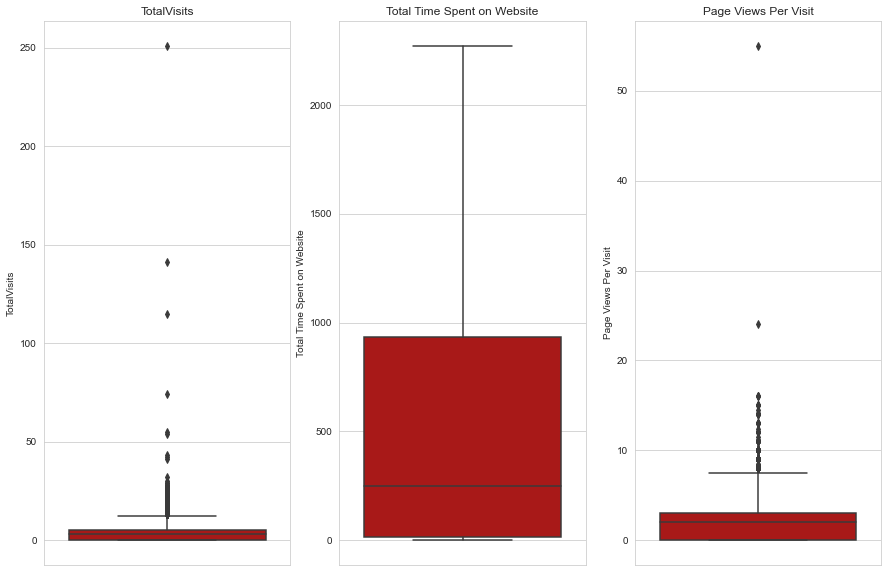

In [35]:
# Let's visualize the outliers

plt.figure(figsize=[15,10])
plt.tight_layout()
sns.set_style('whitegrid')

plt.subplot(1,3,1)
sns.boxplot(data = lead_cl_df, x = 'TotalVisits', palette='gist_heat', orient='v')
plt.title('TotalVisits')

plt.subplot(1,3,2)
sns.boxplot(data = lead_cl_df, x = 'Total Time Spent on Website', palette='gist_heat', orient='v')
plt.title('Total Time Spent on Website')

plt.subplot(1,3,3)
sns.boxplot(data = lead_cl_df, x = 'Page Views Per Visit', palette='gist_heat', orient='v')
plt.title('Page Views Per Visit')

plt.show()

- From the above boxplots we can observe two outlier variables in our dataset __('TotalVisits' and 'Page Views Per Visit')__. 
- We need to do a 0.99-0.1 analysis in order to correct the outliers.

In [36]:
lead_cl_df['TotalVisits'].describe()

count    9240.000000
mean        3.394156
std         4.836682
min         0.000000
25%         0.000000
50%         3.000000
75%         5.000000
max       251.000000
Name: TotalVisits, dtype: float64

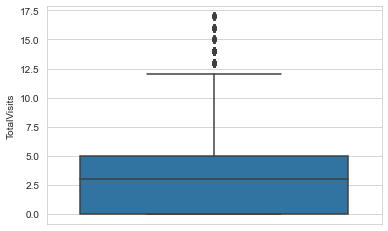

In [37]:
#Outlier Treatment: Remove top & bottom 1% of the Column Outlier values

Q3 = lead_cl_df.TotalVisits.quantile(0.99)
lead_cl_df = lead_cl_df[(lead_cl_df.TotalVisits <= Q3)]

Q1 = lead_cl_df.TotalVisits.quantile(0.01)
lead_cl_df = lead_cl_df[(lead_cl_df.TotalVisits >= Q1)]

sns.boxplot(y=lead_cl_df['TotalVisits'])
plt.show()

In [38]:
lead_cl_df['Page Views Per Visit'].describe()

count    9157.000000
mean        2.302302
std         2.066450
min         0.000000
25%         0.000000
50%         2.000000
75%         3.000000
max        16.000000
Name: Page Views Per Visit, dtype: float64

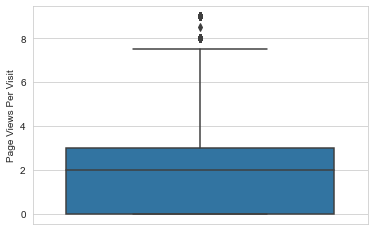

In [39]:
#Outlier Treatment: Remove top & bottom 1% 

Q3 = lead_cl_df['Page Views Per Visit'].quantile(0.99)
lead_cl_df = lead_cl_df[lead_cl_df['Page Views Per Visit'] <= Q3]

Q1 = lead_cl_df['Page Views Per Visit'].quantile(0.01)
lead_cl_df = lead_cl_df[lead_cl_df['Page Views Per Visit'] >= Q1]

sns.boxplot(y=lead_cl_df['Page Views Per Visit'])
plt.show()

In [40]:
lead_cl_df['Page Views Per Visit'].describe()

count    9090.000000
mean        2.232693
std         1.901055
min         0.000000
25%         0.000000
50%         2.000000
75%         3.000000
max         9.000000
Name: Page Views Per Visit, dtype: float64

- The outliers have been removed from the dataset, now our data is clean and free from outliers.

## Data Preparation

### Train-Test Split

In [41]:
# Separating the Target Variable

y = lead_cl_df['Converted']

y.head()

0    0
1    0
2    1
3    0
4    1
Name: Converted, dtype: int64

In [42]:
# Remaining dataset

X = lead_cl_df.drop('Converted', axis=1)

X.head()

,Do Not Email,Do Not Call,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Search,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Origin_Quick Add Form,Lead Source_Blog,Lead Source_Click2call,Lead Source_Direct traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Live chat,Lead Source_Nc_edm,Lead Source_Olark chat,Lead Source_Organic search,Lead Source_Pay per click ads,Lead Source_Press_release,Lead Source_Reference,Lead Source_Referral sites,Lead Source_Social media,Lead Source_Testone,Lead Source_Welearn,Lead Source_Welearnblog_home,Lead Source_Welingak website,Lead Source_Youtubechannel,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Marked Spam,Last Activity_Email Opened,Last Activity_Email Received,Last Activity_Form Submitted on Website,Last Activity_Had a Phone Conversation,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_Resubscribed to emails,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Last Activity_View in browser link Clicked,Last Activity_Visited Booth in Tradeshow,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,What matters most to you in choosing a course_Flexibility & Convenience,What matters most to you in choosing a course_Other,Last Notable Activity_Email Bounced,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Marked Spam,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,0,0,0.0,0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
1,0,0,5.0,674,2.5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
2,0,0,2.0,1532,2.0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
3,0,0,1.0,305,1.0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
4,0,0,2.0,1428,1.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0


In [43]:
# Splitting the dataset

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.70, random_state=100)

### Feature Standardization

In [44]:
scaler = StandardScaler()

In [45]:
# Scaling the Total Time Spent on Website for the easy analysis.

X_train[['Total Time Spent on Website']] = scaler.fit_transform(X_train[['Total Time Spent on Website']])

In [46]:
X_train.head()

,Do Not Email,Do Not Call,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Search,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Origin_Quick Add Form,Lead Source_Blog,Lead Source_Click2call,Lead Source_Direct traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Live chat,Lead Source_Nc_edm,Lead Source_Olark chat,Lead Source_Organic search,Lead Source_Pay per click ads,Lead Source_Press_release,Lead Source_Reference,Lead Source_Referral sites,Lead Source_Social media,Lead Source_Testone,Lead Source_Welearn,Lead Source_Welearnblog_home,Lead Source_Welingak website,Lead Source_Youtubechannel,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Marked Spam,Last Activity_Email Opened,Last Activity_Email Received,Last Activity_Form Submitted on Website,Last Activity_Had a Phone Conversation,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_Resubscribed to emails,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Last Activity_View in browser link Clicked,Last Activity_Visited Booth in Tradeshow,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,What matters most to you in choosing a course_Flexibility & Convenience,What matters most to you in choosing a course_Other,Last Notable Activity_Email Bounced,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Marked Spam,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
302,0,0,7.0,-0.428736,2.33,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
6087,1,0,0.0,-0.887355,0.00,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
1033,0,0,5.0,-0.025151,5.00,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
7656,1,0,6.0,-0.241619,6.00,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
3241,0,0,4.0,0.897591,1.33,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0


In [47]:
# Checking the conversion rate from 'Converted' column

round((sum(y)/len(y.index)*100),2)

38.45

- We have a conversion rate of __~38.45 %__.

### Correlation of the dataset

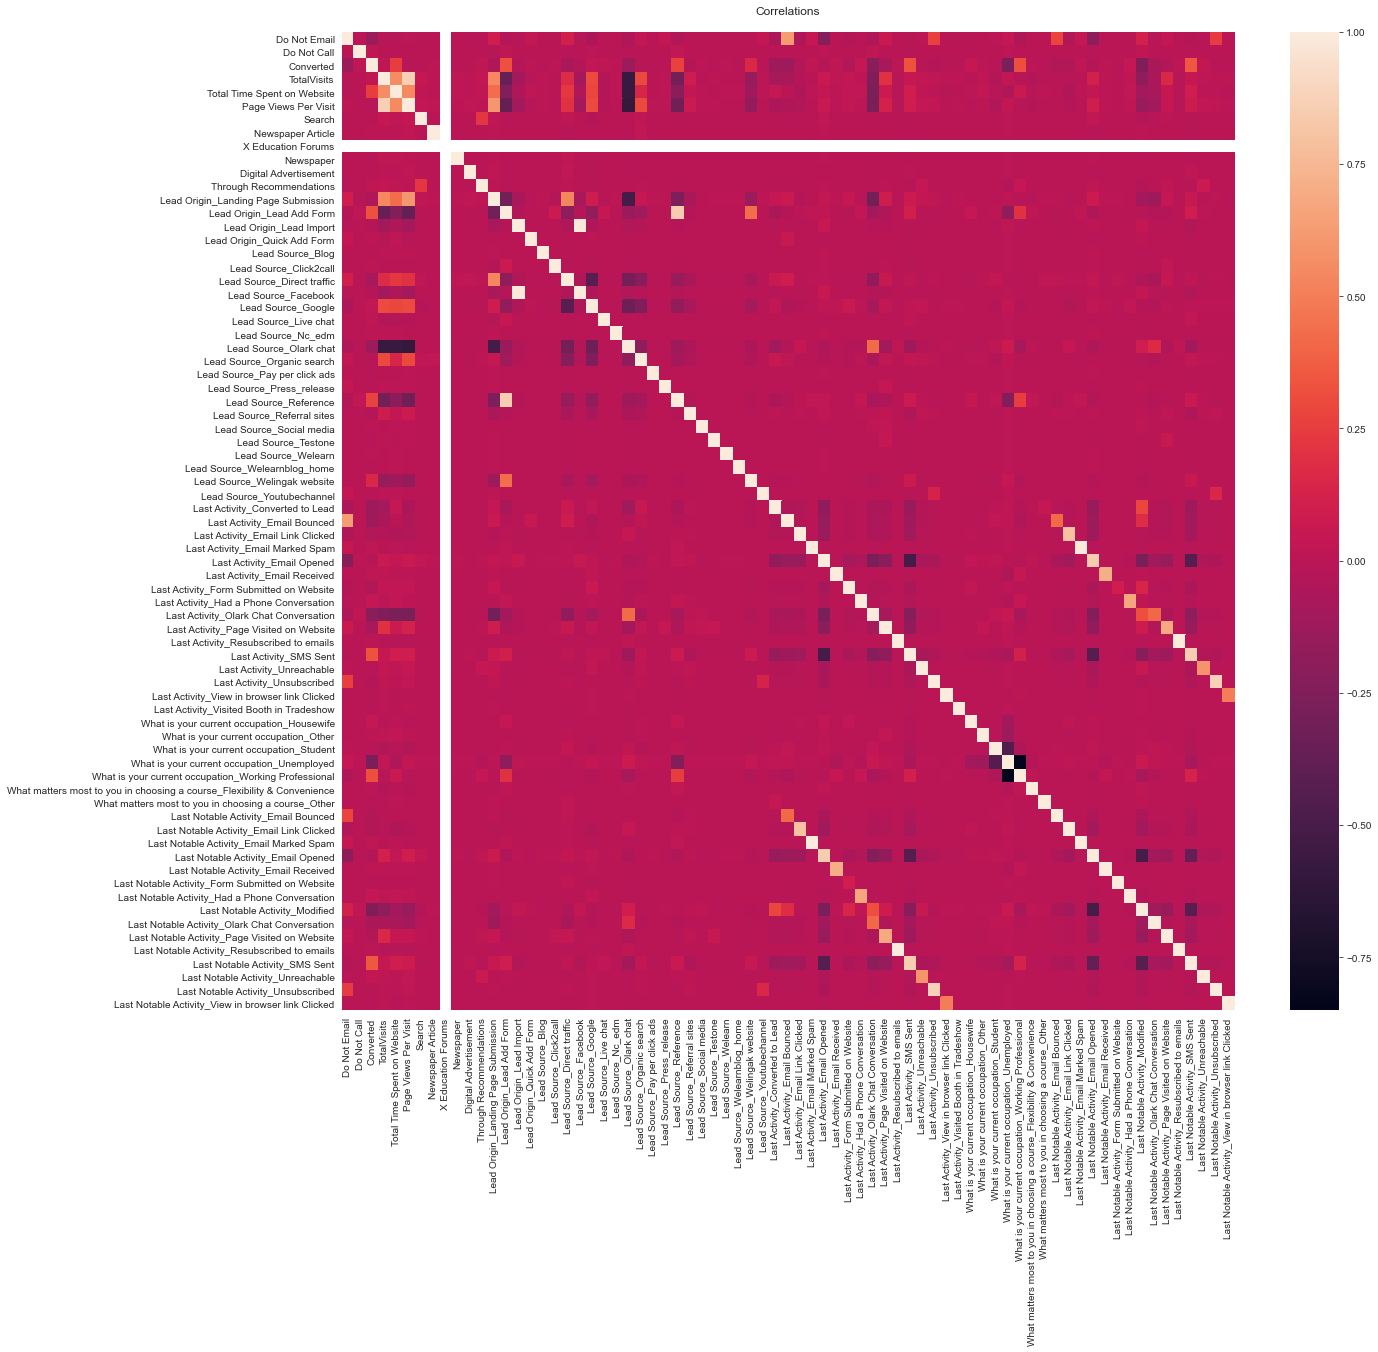

In [48]:
# With the help of Heatmap we can identify the high correlated data.

plt.figure(figsize=[20,18])

sns.heatmap(lead_cl_df.corr(method='spearman'))

plt.title('Correlations\n')

plt.show()

In [49]:
# Here, X Education Forums has no data so, it is better to remove from the dataset.
# Also, we need to remove the highly correlated value.

high_corr = ['X Education Forums','Lead Source_Olark chat', 'What is your current occupation_Unemployed']

X_train = X_train.drop(high_corr,1)
X_test = X_test.drop(high_corr,1)

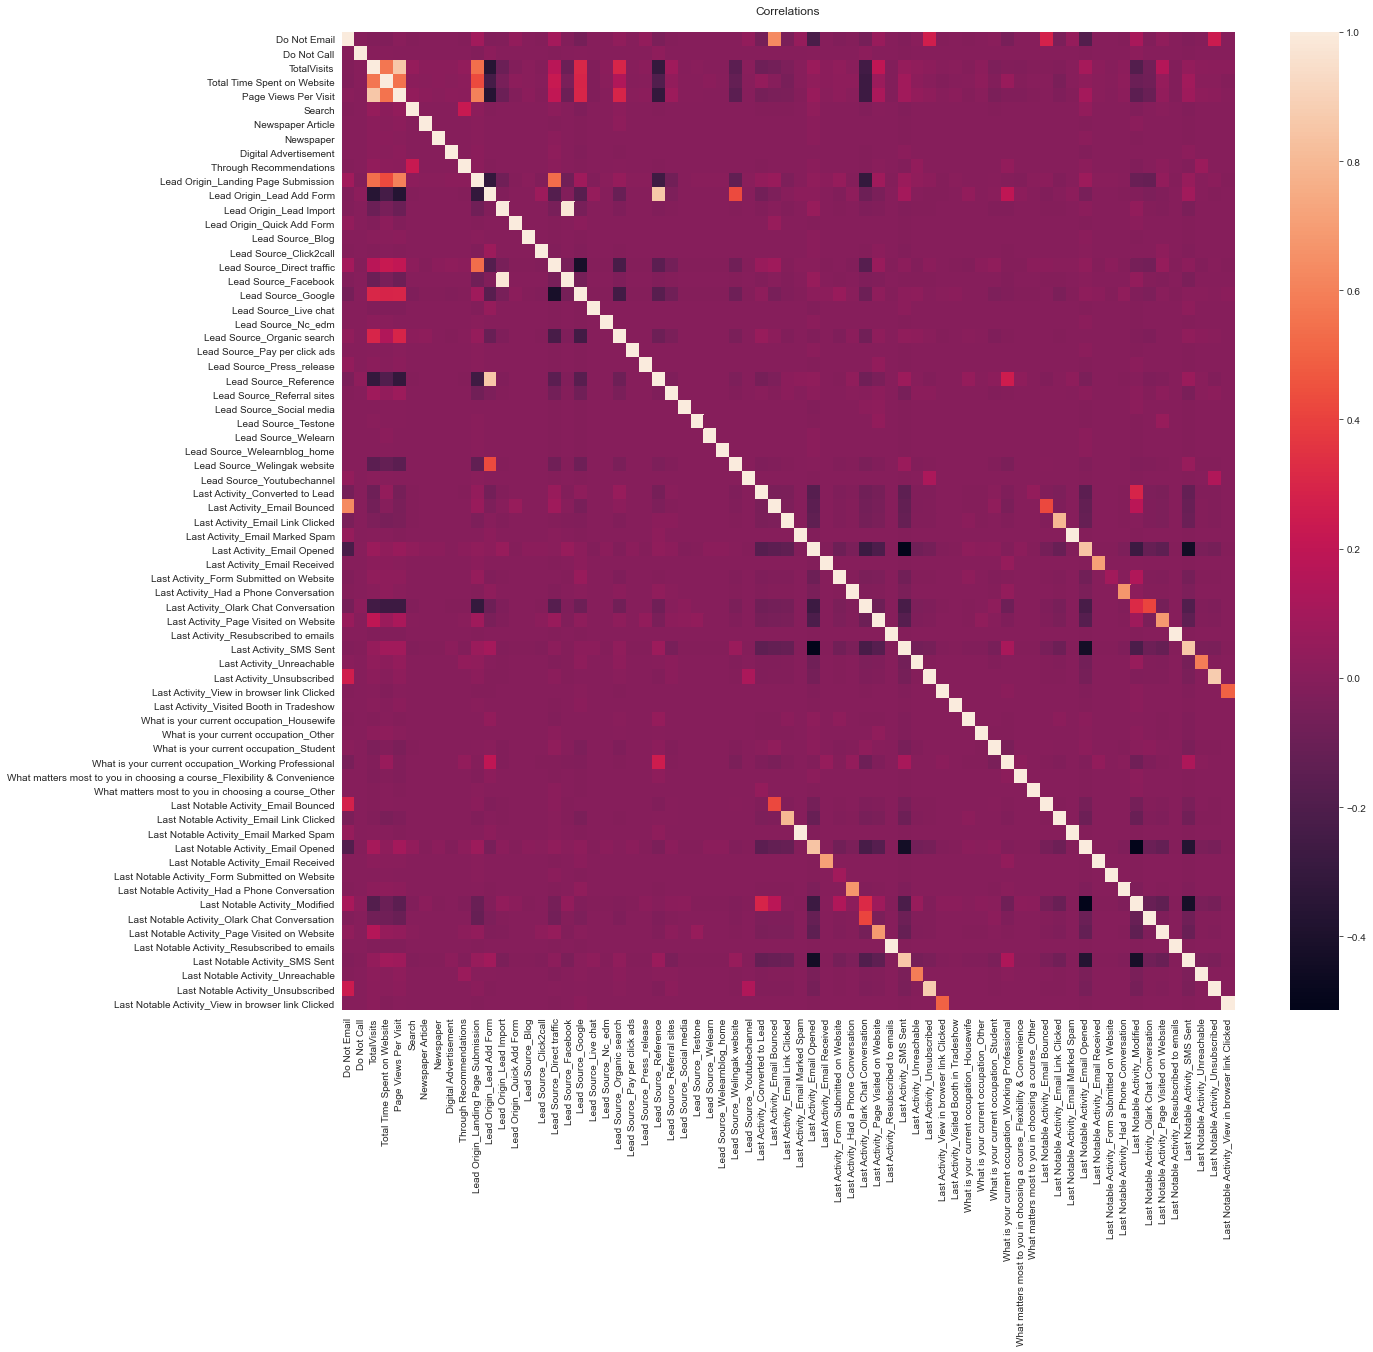

In [50]:
# Checking for the correlation again

plt.figure(figsize=[20,18])

sns.heatmap(lead_cl_df[X_train.columns].corr(method='spearman'))

plt.title('Correlations\n')

plt.show()

- We have removed some of the correlated and null columns but it is quiet difficult to spot the high correlation attributes.
- We will start building the model and with the help of VIFs and p-Value we will find out the relations.

## Building the Model

In [51]:
logis=sm.GLM(y_train,(sm.add_constant(X_train)),familt=sm.families.Binomial())
logis.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6363
Model:                            GLM   Df Residuals:                     6299
Model Family:                Gaussian   Df Model:                           63
Link Function:               identity   Scale:                         0.13556
Method:                          IRLS   Log-Likelihood:                -2638.8
Date:                Mon, 08 Mar 2021   Deviance:                       853.88
Time:                        18:34:36   Pearson chi2:                     854.
No. Iterations:                     3                                         
Covariance Type:            nonrobust                                         
===========================================================================================================================================
                                                                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------------------------------------------
const                                                                       0.8557      0.369      2.321      0.020       0.133       1.578
Do Not Email                                                               -0.1568      0.024     -6.420      0.000      -0.205      -0.109
Do Not Call                                                                 0.4636      0.261      1.777      0.076      -0.048       0.975
TotalVisits                                                                 0.0143      0.002      5.735      0.000       0.009       0.019
Total Time Spent on Website                                                 0.1777      0.005     33.773      0.000       0.167       0.188
Page Views Per Visit                                                       -0.0149      0.004     -3.529      0.000      -0.023      -0.007
Search                                                                      0.0617      0.151      0.409      0.683      -0.234       0.357
Newspaper Article                                                           0.6611      0.369      1.790      0.073      -0.063       1.385
Newspaper                                                                  -0.7534      0.369     -2.043      0.041      -1.476      -0.031
Digital Advertisement                                                      -0.0955      0.213     -0.448      0.654      -0.513       0.322
Through Recommendations                                                     0.1780      0.215      0.828      0.408      -0.243       0.599
Lead Origin_Landing Page Submission                                        -0.0149      0.014     -1.050      0.294      -0.043       0.013
Lead Origin_Lead Add Form                                                   0.5823      0.080      7.244      0.000       0.425       0.740
Lead Origin_Lead Import                                                     0.5372      0.375      1.431      0.152      -0.198       1.273
Lead Origin_Quick Add Form                                                  0.3519      0.370      0.951      0.341      -0.373       1.077
Lead Source_Blog                                                         3.846e-15   3.53e-15      1.088      0.276   -3.08e-15    1.08e-14
Lead Source_Click2call                                                     -0.2245      0.274     -0.819      0.413      -0.762       0.313
Lead Source_Direct traffic                                                 -0.1841      0.021     -8.706      0.000      -0.226      -0.143
Lead Source_Facebook                                                       -0.6983      0.370     -1.886      0.059      -1.424       0.027
Lea

- There are many attributes having an insignificant p-values and we will try out the RFE for the feature elimination.

### RFE

In [52]:
# Instantiating

logreg = LogisticRegression()

In [53]:
# Running rfe with different variable count

# Running with 19 variables

rfem = RFE(logreg, 19)
rfem = rfem.fit(X_train, y_train)

In [54]:
# Checking for the true and false for the varibales after rfe

rfem.support_

array([ True, False, False,  True, False, False, False, False, False,
       False, False,  True, False, False, False, False,  True,  True,
        True, False, False,  True, False, False, False,  True, False,
       False, False, False,  True, False,  True,  True, False, False,
       False, False, False, False,  True, False, False, False, False,
       False, False, False,  True,  True, False,  True, False, False,
       False, False, False, False, False, False,  True, False, False,
       False, False,  True,  True,  True, False])

In [55]:
# Selecting the 'True' columns in rfem.support_

col = X_train.columns[rfem.support_]

X_train_1 = sm.add_constant(X_train[col]) # Adding constant

In [56]:
# Creating 1st model after RFE

logis1=sm.GLM(y_train,X_train_1,family=sm.families.Binomial())

reg1=logis1.fit()

reg1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6363
Model:                            GLM   Df Residuals:                     6343
Model Family:                Binomial   Df Model:                           19
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2619.1
Date:                Mon, 08 Mar 2021   Deviance:                       5238.2
Time:                        18:34:44   Pearson chi2:                 6.95e+03
No. Iterations:                    22                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -0.3074      0.090     -3.424      0.001      -0.483      -0.131
Do Not Email                                            -1.3703      0.201     -6.831      0.000      -1.763      -0.977
Total Time Spent on Website                              1.0846      0.040     27.260      0.000       1.007       1.163
Lead Origin_Lead Add Form                                2.6404      0.202     13.097      0.000       2.245       3.036
Lead Source_Direct traffic                              -1.2927      0.116    -11.141      0.000      -1.520      -1.065
Lead Source_Facebook                                    -1.2413      0.526     -2.359      0.018      -2.273      -0.210
Lead Source_Google                                      -0.8971      0.109     -8.246      0.000      -1.110      -0.684
Lead Source_Organic search                              -1.1812      0.136     -8.657      0.000      -1.449      -0.914
Lead Source_Referral sites                              -0.9853      0.331     -2.979      0.003      -1.634      -0.337
Lead Source_Welingak website                             2.9007      1.033      2.808      0.005       0.876       4.926
Last Activity_Converted to Lead                         -1.0999      0.208     -5.295      0.000      -1.507      -0.693
Last Activity_Email Bounced                             -0.9366      0.386     -2.428      0.015      -1.693      -0.180
Last Activity_Olark Chat Conversation                   -1.4257      0.160     -8.937      0.000      -1.738      -1.113
What is your current occupation_Housewife               24.0659   2.32e+04      0.001      0.999   -4.54e+04    4.55e+04
What is your current occupation_Other                    1.1077      0.720      1.539      0.124      -0.303       2.518
What is your current occupation_Working Professional     2.8054      0.189     14.879      0.000       2.436       3.175
Last Notable Activity_Had a Phone Conversation          24.4377   2.36e+04      0.001      0.999   -4.62e+04    4.63e+04
Last Notable Activity_SMS Sent                           1.6077      0.081     19.730      0.000       1.448       1.767
Last Notable Activity_Unreachable                        2.0113      0.611      3.291      0.001       0.814       3.209
Last Notable Activity_Unsubscribed                       1.4288      0.485      2.949      0.003       0.479       2.378
========================================================================================================================
"""

- Now, From the above summary presented there are some features having high p -values, we will drop features which is having insignificant values one by one and create new model again and again until all the features attain significant p- value.

### VIF

In [57]:
# Creating VIF Dataframe
vif = pd.DataFrame()

# Adding features
vif['Features'] = X_train_1[col].columns

# Calculating VIF
vif['VIF'] = [variance_inflation_factor(X_train_1[col].values,i) for i in range(X_train_1[col].shape[1])]

# Rounding the VIF values
vif['VIF']=round(vif['VIF'],2)

# Sorting the VIF values
vif=vif.sort_values(by='VIF',ascending=False)

vif

,Features,VIF
0,Do Not Email,1.99
10,Last Activity_Email Bounced,1.78
2,Lead Origin_Lead Add Form,1.46
16,Last Notable Activity_SMS Sent,1.38
8,Lead Source_Welingak website,1.29
3,Lead Source_Direct traffic,1.26
5,Lead Source_Google,1.24
14,What is your current occupation_Working Profes...,1.18
1,Total Time Spent on Website,1.15
18,Last Notable Activity_Unsubscribed,1.13


#### As we can see that all features are having vif values less than 5, hence there is no multicollinearity issue in the dataset.

As expained before we will drop the highest in-significant features i.e 'What is your current occupation_Housewife' having 0.999 p - value.

In [58]:
# Dropping the most insignificant values ('What is your current occupation_Housewife') and constant

X_train_2 = X_train_1.drop(['const','What is your current occupation_Housewife'],1)

In [59]:
# Creating a new model

X_train_2 = sm.add_constant(X_train_2)                          
logis2 = sm.GLM(y_train,X_train_2,families=sm.families.Binomial())  
reg2 = logis2.fit()                                                 
reg2.summary()                                                      

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6363
Model:                            GLM   Df Residuals:                     6344
Model Family:                Gaussian   Df Model:                           18
Link Function:               identity   Scale:                         0.13759
Method:                          IRLS   Log-Likelihood:                -2708.7
Date:                Mon, 08 Mar 2021   Deviance:                       872.87
Time:                        18:34:44   Pearson chi2:                     873.
No. Iterations:                     3                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                    0.4050      0.013     30.806      0.000       0.379       0.431
Do Not Email                                            -0.1680      0.024     -7.115      0.000      -0.214      -0.122
Total Time Spent on Website                              0.1807      0.005     34.627      0.000       0.170       0.191
Lead Origin_Lead Add Form                                0.3818      0.022     16.984      0.000       0.338       0.426
Lead Source_Direct traffic                              -0.1846      0.016    -11.665      0.000      -0.216      -0.154
Lead Source_Facebook                                    -0.1733      0.062     -2.784      0.005      -0.295      -0.051
Lead Source_Google                                      -0.1216      0.015     -8.059      0.000      -0.151      -0.092
Lead Source_Organic search                              -0.1641      0.019     -8.812      0.000      -0.201      -0.128
Lead Source_Referral sites                              -0.1518      0.044     -3.485      0.000      -0.237      -0.066
Lead Source_Welingak website                             0.2113      0.041      5.112      0.000       0.130       0.292
Last Activity_Converted to Lead                         -0.1349      0.023     -5.919      0.000      -0.180      -0.090
Last Activity_Email Bounced                             -0.0324      0.034     -0.967      0.334      -0.098       0.033
Last Activity_Olark Chat Conversation                   -0.1763      0.017    -10.459      0.000      -0.209      -0.143
What is your current occupation_Other                    0.2068      0.118      1.760      0.078      -0.024       0.437
What is your current occupation_Working Professional     0.3430      0.018     18.770      0.000       0.307       0.379
Last Notable Activity_Had a Phone Conversation           0.5713      0.131      4.348      0.000       0.314       0.829
Last Notable Activity_SMS Sent                           0.2770      0.012     23.882      0.000       0.254       0.300
Last Notable Activity_Unreachable                        0.3295      0.081      4.055      0.000       0.170       0.489
Last Notable Activity_Unsubscribed                       0.1792      0.070      2.572      0.010       0.043       0.316
========================================================================================================================
"""

In [60]:
# Dropping 'Last Activity_Email Bounced' and recreating the result

X_train_3 = X_train_2.drop(['const','Last Activity_Email Bounced'],1)

In [61]:
# Re-Creating a new model

X_train_3 = sm.add_constant(X_train_3)                              
logis3 = sm.GLM(y_train,X_train_3,families=sm.families.Binomial())  
reg3 = logis3.fit()                                                 
reg3.summary()                                                      

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6363
Model:                            GLM   Df Residuals:                     6345
Model Family:                Gaussian   Df Model:                           17
Link Function:               identity   Scale:                         0.13759
Method:                          IRLS   Log-Likelihood:                -2709.2
Date:                Mon, 08 Mar 2021   Deviance:                       873.00
Time:                        18:34:45   Pearson chi2:                     873.
No. Iterations:                     3                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                    0.4041      0.013     30.814      0.000       0.378       0.430
Do Not Email                                            -0.1824      0.018     -9.966      0.000      -0.218      -0.147
Total Time Spent on Website                              0.1806      0.005     34.615      0.000       0.170       0.191
Lead Origin_Lead Add Form                                0.3821      0.022     17.002      0.000       0.338       0.426
Lead Source_Direct traffic                              -0.1843      0.016    -11.651      0.000      -0.215      -0.153
Lead Source_Facebook                                    -0.1739      0.062     -2.793      0.005      -0.296      -0.052
Lead Source_Google                                      -0.1211      0.015     -8.030      0.000      -0.151      -0.092
Lead Source_Organic search                              -0.1639      0.019     -8.805      0.000      -0.200      -0.127
Lead Source_Referral sites                              -0.1517      0.044     -3.482      0.000      -0.237      -0.066
Lead Source_Welingak website                             0.2118      0.041      5.125      0.000       0.131       0.293
Last Activity_Converted to Lead                         -0.1343      0.023     -5.894      0.000      -0.179      -0.090
Last Activity_Olark Chat Conversation                   -0.1753      0.017    -10.418      0.000      -0.208      -0.142
What is your current occupation_Other                    0.2088      0.118      1.777      0.076      -0.021       0.439
What is your current occupation_Working Professional     0.3430      0.018     18.770      0.000       0.307       0.379
Last Notable Activity_Had a Phone Conversation           0.5719      0.131      4.353      0.000       0.314       0.829
Last Notable Activity_SMS Sent                           0.2786      0.011     24.272      0.000       0.256       0.301
Last Notable Activity_Unreachable                        0.3308      0.081      4.071      0.000       0.172       0.490
Last Notable Activity_Unsubscribed                       0.1942      0.068      2.858      0.004       0.061       0.327
========================================================================================================================
"""

In [62]:
# Dropping 'What is your current occupation_Other' and recreating the model

X_train_4 = X_train_3.drop(['const','What is your current occupation_Other'],1)

In [63]:
# Re-Creating a new model

X_train_4 = sm.add_constant(X_train_4)                              
logis4 = sm.GLM(y_train,X_train_4,families=sm.families.Binomial())  
reg4 = logis4.fit()                                                 
reg4.summary()                                      

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6363
Model:                            GLM   Df Residuals:                     6346
Model Family:                Gaussian   Df Model:                           16
Link Function:               identity   Scale:                         0.13763
Method:                          IRLS   Log-Likelihood:                -2710.8
Date:                Mon, 08 Mar 2021   Deviance:                       873.43
Time:                        18:34:45   Pearson chi2:                     873.
No. Iterations:                     3                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                    0.4046      0.013     30.852      0.000       0.379       0.430
Do Not Email                                            -0.1823      0.018     -9.960      0.000      -0.218      -0.146
Total Time Spent on Website                              0.1808      0.005     34.674      0.000       0.171       0.191
Lead Origin_Lead Add Form                                0.3826      0.022     17.024      0.000       0.339       0.427
Lead Source_Direct traffic                              -0.1842      0.016    -11.640      0.000      -0.215      -0.153
Lead Source_Facebook                                    -0.1742      0.062     -2.798      0.005      -0.296      -0.052
Lead Source_Google                                      -0.1213      0.015     -8.040      0.000      -0.151      -0.092
Lead Source_Organic search                              -0.1637      0.019     -8.792      0.000      -0.200      -0.127
Lead Source_Referral sites                              -0.1521      0.044     -3.490      0.000      -0.237      -0.067
Lead Source_Welingak website                             0.2111      0.041      5.109      0.000       0.130       0.292
Last Activity_Converted to Lead                         -0.1348      0.023     -5.915      0.000      -0.179      -0.090
Last Activity_Olark Chat Conversation                   -0.1753      0.017    -10.417      0.000      -0.208      -0.142
What is your current occupation_Working Professional     0.3426      0.018     18.743      0.000       0.307       0.378
Last Notable Activity_Had a Phone Conversation           0.5712      0.131      4.347      0.000       0.314       0.829
Last Notable Activity_SMS Sent                           0.2781      0.011     24.229      0.000       0.256       0.301
Last Notable Activity_Unreachable                        0.3303      0.081      4.065      0.000       0.171       0.490
Last Notable Activity_Unsubscribed                       0.1936      0.068      2.849      0.004       0.060       0.327
========================================================================================================================
"""

- Now, from the above summary we can say that all the variables present in this model are __significant__ as no variables is having p - value greater than 5% hence we can proceed with our next step

In [64]:
# Re-Checking the VIFs for the confirmation

# Checking VIF again just to be sure

X_train_4_1 = X_train_4.drop('const',1)
vif=pd.DataFrame()                        
vif['Features']=X_train_4_1.columns       

# Now calculating

vif['VIF']=[variance_inflation_factor(X_train_4_1.values,i) for i in range(X_train_4_1.shape[1])]

# Rounding the vif values

vif['VIF']=round(vif['VIF'],2)

# Sorting the vif dataset

vif=vif.sort_values(by='VIF',ascending=False)

vif   # viewing the dataset

,Features,VIF
2,Lead Origin_Lead Add Form,1.46
13,Last Notable Activity_SMS Sent,1.35
8,Lead Source_Welingak website,1.29
3,Lead Source_Direct traffic,1.25
5,Lead Source_Google,1.24
0,Do Not Email,1.19
11,What is your current occupation_Working Profes...,1.18
1,Total Time Spent on Website,1.15
6,Lead Source_Organic search,1.13
9,Last Activity_Converted to Lead,1.10


- As there are no multicollinearity issues as all the values are below 5.00 and hence we can proceed to __Predict__ the model.
- Our final model is __X_train_4 & reg4__ and we are predicting our dataset based on this.

## Predicting the train model

In [65]:
# Predicting the train dataset

y_train_pred = reg4.predict(X_train_4)

y_train_pred_final = pd.DataFrame({'Converted': y_train.values, 'Converted_probability': y_train_pred, 'ID': y_train.index})

y_train_pred_final.head()

,Converted,Converted_probability,ID
302,0,0.175028,302
6087,0,0.061816,6087
1033,0,0.278781,1033
7656,0,0.272437,7656
3241,1,0.660775,3241


### ROC Curve Plotting

- ROC curve shows the trade off between sensitivity and specificity - means if sensitivity increases specificity will decrease.
- The curve closer to the left side border then right side of the border is more accurate.
- The curve closer to the 45-degree diagonal of the ROC space is less accurate.

In [66]:
# Importing libraries for roc_curve

from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

In [67]:
# Creating a function to plot roc curve

def lead_roc(real, probability):
    
    # Creating roc curve values like false positive rate , true positive rate and threshold
    fpr, tpr, thresholds = roc_curve(real, probability, drop_intermediate=True)
    
    # Calculating the auc score(area under the curve)
    auc_score = roc_auc_score(real, probability)
    
    # Setting the figure
    plt.figure(figsize=[8,4])
    
    # Plotting the roc_curve
    plt.plot(fpr,tpr,label='ROC Curve (area= %0.2f)' %auc_score)
    
    # Plotting the 45% dotted line
    plt.plot([0,1], [0,1], 'r--')
             
    # Setting the x-axis limit
    plt.xlim([0.0, 1.0])
             
    # Setting the y-axis limit
    plt.ylim([0.0, 1.05])
             
    # Setting the x-axis label
    plt.xlabel('False Positive Rate')
             
    # Setting the y-axis label
    plt.ylabel('True Positive Rate')
             
    # Setting the title
    plt.title('Receiver Operating Characteristic')
    
    # Setting the legend on the left below to show the value of auc    
    plt.legend(loc="lower right")
    
    # Showing the plot
    plt.show()

    # no return         
    return None             

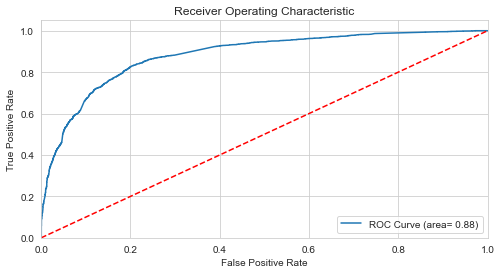

In [68]:
# Calling the roc curve for plotting

lead_roc(y_train_pred_final.Converted, y_train_pred_final.Converted_probability)

Points to be noted from the ROC Curve
- The curve is closer to the left border than to the right border hence our model is having great accuracy.
- The curve area is 88% of the total area.

### Finding the Optimal Cutoff Point

In [69]:
# 10 points are being created out of which we will only one point for cutoff point.

numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i] = y_train_pred_final.Converted_probability.map(lambda x:1 if x>i else 0)
y_train_pred_final.head()

,Converted,Converted_probability,ID,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
302,0,0.175028,302,1,1,0,0,0,0,0,0,0,0
6087,0,0.061816,6087,1,0,0,0,0,0,0,0,0,0
1033,0,0.278781,1033,1,1,1,0,0,0,0,0,0,0
7656,0,0.272437,7656,1,1,1,0,0,0,0,0,0,0
3241,1,0.660775,3241,1,1,1,1,1,1,1,0,0,0


Now, after creating series of points let's check the possibilities of choosing any one points from 0 to 0.9. We will do this by finding '__Accuracy__', '__Sensitivity__' and '__Specificity__' for each points. These three methods will tell us how our model is - whether it is having low accuray or high or number of relevance data points is high or low etc.

In [70]:
# Importing necessary library

from sklearn.metrics import confusion_matrix

In [71]:
# Creating a dataframe to store all the values to be created

df_cutoffs=pd.DataFrame(columns=['Probability','Accuracy','Sensitvity','Specificity'])

# from 0 to 0.9 with set size 0.1

var=[0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]   

for i in var:
    cm_matrix=confusion_matrix(y_train_pred_final['Converted'],y_train_pred_final[i])  # creating confusion matrix 
    total=sum(sum(cm_matrix))                                                          # Taking the sum of the matrix
    accuracy=(cm_matrix[0,0]+cm_matrix[1,1])/total                                     # Storing Accuracy Data 
    sensitivity=cm_matrix[1,1]/(cm_matrix[1,0]+cm_matrix[1,1])                         # Storing Sensitivity Data
    specificity=cm_matrix[0,0]/(cm_matrix[0,0]+cm_matrix[0,1])                         # Storing Specificity Data
    df_cutoffs.loc[i]=[i, accuracy, sensitivity, specificity]                          # Inserting all the data into the dataframe created earlier

print(df_cutoffs)   

     Probability  Accuracy  Sensitvity  Specificity
0.0          0.0  0.430300    0.996705     0.080813
0.1          0.1  0.565771    0.975700     0.312834
0.2          0.2  0.692126    0.939044     0.539771
0.3          0.3  0.794908    0.864498     0.751970
0.4          0.4  0.809838    0.799012     0.816518
0.5          0.5  0.814396    0.686161     0.893520
0.6          0.6  0.787522    0.528830     0.947141
0.7          0.7  0.751061    0.394563     0.971029
0.8          0.8  0.721829    0.295305     0.985006
0.9          0.9  0.690712    0.203048     0.991614


As we can see from the above data we have created points for accuracy , sensitivity and specificity for all probability points from 0 to 0.9. Out of this we have to choose one as a cutoff point and it is __probability cutoff = 0.4__ because all the accuracy , sensitivity and specificity are having nearly same value which is an ideal point to consider for as we can't ignore any one from three.

Lets plot this data and see the convergence point for the 'accuracy', 'sensitivity' and 'specificity'.

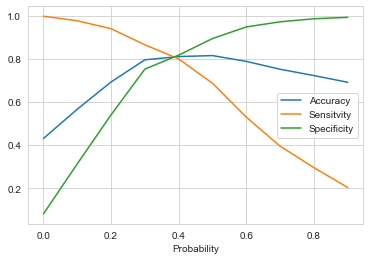

In [72]:
# Plotting 'Accuracy', 'Sensitivity' and 'Specificity' for various possibilities from 0 to 0.9

df_cutoffs.plot.line(x='Probability', y=['Accuracy','Sensitvity','Specificity'])
plt.show()

- From the above graph it is prominent that __0.4__ is perfect for the probability cutoff.

In [73]:
# Predicting the outcomes with probability cutoff as 0.4 by creating new columns in the final dataset

# Predicted value
y_train_pred_final['Predicted'] = y_train_pred_final['Converted_probability'].map(lambda x:1 if x >0.4 else 0)  
 
y_train_pred_final.head()

,Converted,Converted_probability,ID,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,Predicted
302,0,0.175028,302,1,1,0,0,0,0,0,0,0,0,0
6087,0,0.061816,6087,1,0,0,0,0,0,0,0,0,0,0
1033,0,0.278781,1033,1,1,1,0,0,0,0,0,0,0,0
7656,0,0.272437,7656,1,1,1,0,0,0,0,0,0,0,0
3241,1,0.660775,3241,1,1,1,1,1,1,1,0,0,0,1


### Precision and Recall

In [74]:
# Creating confusion matrix to find precision and recall score

confusion_pr=confusion_matrix(y_train_pred_final.Converted,y_train_pred_final.Predicted)
confusion_pr

array([[3213,  722],
       [ 488, 1940]], dtype=int64)

In [75]:
print('Precision',confusion_pr[1,1]/(confusion_pr[0,1]+confusion_pr[1,1]))    # Printing Pecision score
print('Recall',confusion_pr[1,1]/(confusion_pr[1,0]+confusion_pr[1,1]))       # Printing Recall score

Precision 0.7287753568745304
Recall 0.7990115321252059


Important points to be noted from the outcomes for precision and recall score -

- Our precison percentage is __~73%__ approximately and recall percentage is __79%__.
- This means we have very good model which explains relevancy of __~73%__ and true relevant results about __79%__.

#### Precision and Recall Trade-Off

In [76]:
# Importing precision recall curve from sklearn library

from sklearn.metrics import precision_recall_curve

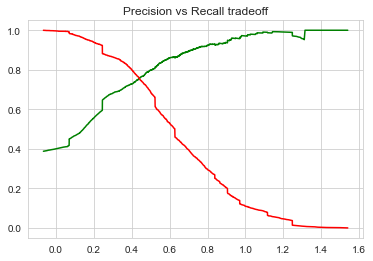

In [77]:
# Creating precision recall curve by crreating three points and plotting

p ,r, thresholds = precision_recall_curve(y_train_pred_final.Converted,y_train_pred_final.Converted_probability)
plt.title('Precision vs Recall tradeoff')
plt.plot(thresholds, p[:-1], "g-")    # Plotting precision
plt.plot(thresholds, r[:-1], "r-")    # Plotting Recall
plt.show()

## Prediction on the test dataset

### Scaling the dataset

In [78]:
# Scalling the variables 'Total Time Spent on Website' with standard scaler and tranforming the X - test dataset

X_test[['Total Time Spent on Website']] = scaler.transform(X_test[['Total Time Spent on Website']])

### Predicting

In [79]:
# Predicting the test dataset with our final model

test_cols = X_train_4.columns[1:]              # Taking the same column train set has
X_test_final = X_test[test_cols]               # Updating it in the final test set
X_test_final = sm.add_constant(X_test_final)   # Adding constant to the final set set
y_pred_test = reg4.predict(X_test_final)       # Predicting the final test set

In [80]:
# Creating a new dataset and saving the prediction values in it

y_test_pred_final = pd.DataFrame({'Converted':y_test.values,'Converted_Probability':y_pred_test,'ID':y_test.index})

y_test_pred_final.head()

,Converted,Converted_Probability,ID
6906,1,0.845542,6906
1873,0,0.184573,1873
771,0,0.139128,771
4495,0,0.170641,4495
9061,1,0.653066,9061


### Model Evaluation

In [81]:
# Predicting the outcomes with probability cutoff as 0.4 by creating new columns in the final test dataset

# Predicted value
y_test_pred_final['Predicted'] = y_test_pred_final['Converted_Probability'].map(lambda x:1 if x>0.4 else 0 ) 

y_test_pred_final.head()

,Converted,Converted_Probability,ID,Predicted
6906,1,0.845542,6906,1
1873,0,0.184573,1873,0
771,0,0.139128,771,0
4495,0,0.170641,4495,0
9061,1,0.653066,9061,1


In [82]:
# Importing the metrics library

from sklearn import metrics

In [83]:
# Checking the accuracy of the test dataset.

print('Accuracy score in predicting test dataset :', metrics.accuracy_score(y_test_pred_final.Converted, 
                                                                           y_test_pred_final.Predicted))

Accuracy score in predicting test dataset : 0.8005133846718006


In [84]:
# Importing the Precision and Recall metrics

from sklearn.metrics import precision_score, recall_score

In [85]:
# Checking the Precision and Recall score

print('Precision score in predicting test dataset:',precision_score(y_test_pred_final.Converted, 
                                                                    y_test_pred_final.Predicted))

print('Recall score in predicting test dataset:',recall_score(y_test_pred_final.Converted, 
                                                              y_test_pred_final.Predicted))

Precision score in predicting test dataset: 0.725625539257981
Recall score in predicting test dataset: 0.788191190253046


## Lead Score Assigning

In [86]:
# Creating new columns for lead number and lead score

y_test_pred_final['Lead Number'] = lead_df.iloc[y_test_pred_final['ID'],1]

y_test_pred_final['Lead Score'] = y_test_pred_final['Converted_Probability'].apply(lambda x:round(x*100))

y_test_pred_final.head()

,Converted,Converted_Probability,ID,Predicted,Lead Number,Lead Score
6906,1,0.845542,6906,1,596625,85
1873,0,0.184573,1873,0,641392,18
771,0,0.139128,771,0,652477,14
4495,0,0.170641,4495,0,616581,17
9061,1,0.653066,9061,1,580888,65


## Conclusion

- The Accuracy, Precision and Recall score we got from the test data are in the acceptable region.
- In business terms, this model has an ability to adjust with the company’s requirements in coming future.
- Important features responsible for good conversion rate or the ones' which contributes more towards the probability of a lead getting converted are:
    - __Last Notable Activity_Had a Phone Conversation__
    - __Lead Origin_Lead Add Form__
    - __What is your current occupation_Working Professional__.